In [1]:
# prompt: Mount drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import os
import pandas as pd
import numpy as np

df = pd.read_csv(os.path.join('/content/drive/MyDrive/', 'Project', 'sentiment_dataset.csv'))
df.dropna(subset=['review_text'], inplace=True)
df.head()


,app_id,app_name,review_text,review_score,review_votes,admiration,amusement,anger,annoyance,approval,...,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral,cluster
0,49520,Borderlands 2,"Very good game, not like any other apocalyptic...",1,1,0.749776,0.003268,0.000072,0.000206,0.028918,...,0.000016,0.004090,0.000324,0.000336,0.003867,0.000068,0.000040,0.000193,0.000423,2
1,550,Left 4 Dead 2,best game please make l4d3 please,1,1,0.539692,0.000166,0.000036,0.000061,0.003855,...,0.000006,0.004092,0.000055,0.000066,0.001623,0.000189,0.000027,0.000086,0.006437,2
2,242760,The Forest,Early Access Review,1,1,0.000714,0.000040,0.000024,0.000091,0.005753,...,0.000005,0.000069,0.000002,0.000042,0.000012,0.000022,0.000074,0.000011,0.990735,1
3,364420,Roguelands,i have only played 6.1 hours of this game and ...,1,1,0.945537,0.000359,0.000095,0.000103,0.004008,...,0.000009,0.000702,0.001023,0.000693,0.000341,0.000037,0.000052,0.023334,0.004714,2
4,217140,Rise of the Triad,One of the best games of 2013 and 'A real con...,1,1,0.990622,0.000173,0.000109,0.000025,0.001281,...,0.000007,0.000213,0.001751,0.000036,0.000082,0.000097,0.000018,0.000082,0.000218,2


In [3]:
import pandas as pd

# Assuming you have a DataFrame named df
# df = pd.DataFrame(data)

# Get all column names as an Index object
column_names = df.columns

# Print column names
print(column_names)

# If you want to convert it to a list
column_names_list = list(df.columns)

# Print the list of column names
sentiments = column_names_list[5:-1]
print(sentiments)


Index(['app_id', 'app_name', 'review_text', 'review_score', 'review_votes',
       'admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring',
       'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval',
       'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief',
       'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization',
       'relief', 'remorse', 'sadness', 'surprise', 'neutral', 'cluster'],
      dtype='object')
['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral']


In [ ]:
!pip install yellowbrick

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

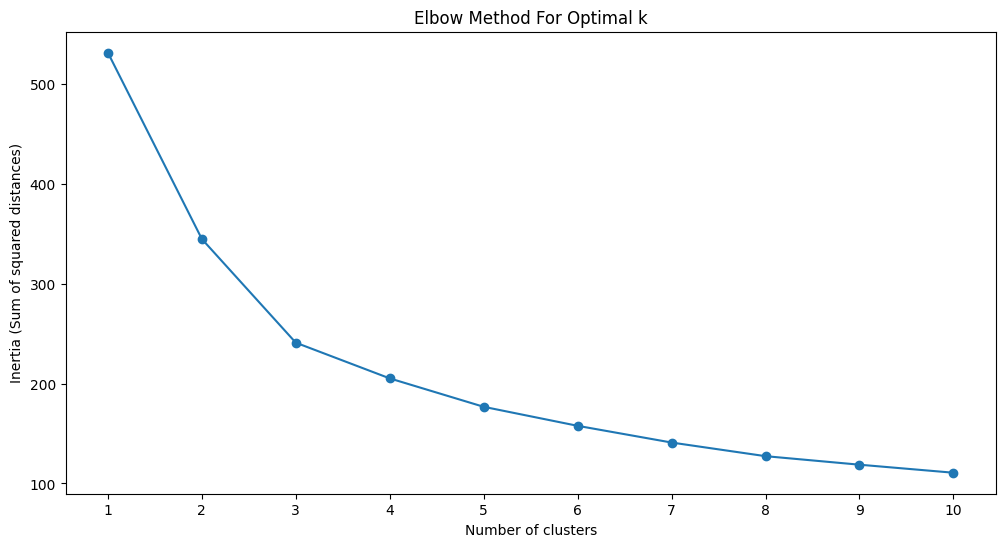

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity

# Load the data
# df = pd.read_csv('your_file.csv') # Replace with the actual file path

# Extracting sentiment columns based on your description, assuming they are columns 5 to the second last
sentiment_columns = df.columns[5:-1]

# Select only the sentiment columns for clustering
X = df[sentiment_columns].values

# Since kNN with sklearn uses distance, and we have similarity, we convert similarity to distance
cosine_dist_matrix = 1 - cosine_similarity(X)

# Create a kNN model using cosine distance
knn_model = NearestNeighbors(n_neighbors=5, metric='cosine')

# Fit the model
knn_model.fit(X)

# Now you can use knn_model to find the nearest neighbors for each point
# For example, to find the nearest neighbors for the first row:
distances, indices = knn_model.kneighbors([X[0]])

# distances will give you the cosine distance to each neighbor
# indices will give you the indices of the nearest neighbors


# Assuming X is your data matrix
# We'll consider a range of clusters, for example, 1 to 10
range_n_clusters = range(1, 11)
inertias = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.plot(range_n_clusters, inertias, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (Sum of squared distances)')
plt.xticks(range_n_clusters)
plt.show()


In [6]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import silhouette_score
# Load the data
# df = pd.read_csv('your_file.csv') # Replace with the actual file path

# Extracting sentiment columns based on your description, assuming they are columns 5 to the second last
sentiment_columns = df.columns[5:-1]

# Select only the sentiment columns for clustering
X = df[sentiment_columns].values

# Since kNN with sklearn uses distance, and we have similarity, we convert similarity to distance
cosine_dist_matrix = 1 - cosine_similarity(X)

# Create a kNN model using cosine distance
knn_model = NearestNeighbors(n_neighbors=3, metric='cosine')

# Fit the model
knn_model.fit(X)

# Now you can use knn_model to find the nearest neighbors for each point
# For example, to find the nearest neighbors for the first row:
distances, indices = knn_model.kneighbors([X[0]])

# distances will give you the cosine distance to each neighbor
# indices will give you the indices of the nearest neighbors
cluster_labels = kmeans.labels_
print(set(cluster_labels))

# Add the cluster labels to the original DataFrame
df['cluster'] = cluster_labels

silhouette_avg = silhouette_score(X, cluster_labels)
print(f"The average silhouette score is : {silhouette_avg}")


{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
The average silhouette score is : 0.5852468396820728


In [ ]:
df.head()

,app_id,app_name,review_text,review_score,review_votes,admiration,amusement,anger,annoyance,approval,...,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral,cluster
0,49520,Borderlands 2,"Very good game, not like any other apocalyptic...",1,1,0.749776,0.003268,0.000072,0.000206,0.028918,...,0.000016,0.004090,0.000324,0.000336,0.003867,0.000068,0.000040,0.000193,0.000423,2
1,550,Left 4 Dead 2,best game please make l4d3 please,1,1,0.539692,0.000166,0.000036,0.000061,0.003855,...,0.000006,0.004092,0.000055,0.000066,0.001623,0.000189,0.000027,0.000086,0.006437,2
2,242760,The Forest,Early Access Review,1,1,0.000714,0.000040,0.000024,0.000091,0.005753,...,0.000005,0.000069,0.000002,0.000042,0.000012,0.000022,0.000074,0.000011,0.990735,0
3,364420,Roguelands,i have only played 6.1 hours of this game and ...,1,1,0.945537,0.000359,0.000095,0.000103,0.004008,...,0.000009,0.000702,0.001023,0.000693,0.000341,0.000037,0.000052,0.023334,0.004714,2
4,217140,Rise of the Triad,One of the best games of 2013 and 'A real con...,1,1,0.990622,0.000173,0.000109,0.000025,0.001281,...,0.000007,0.000213,0.001751,0.000036,0.000082,0.000097,0.000018,0.000082,0.000218,2


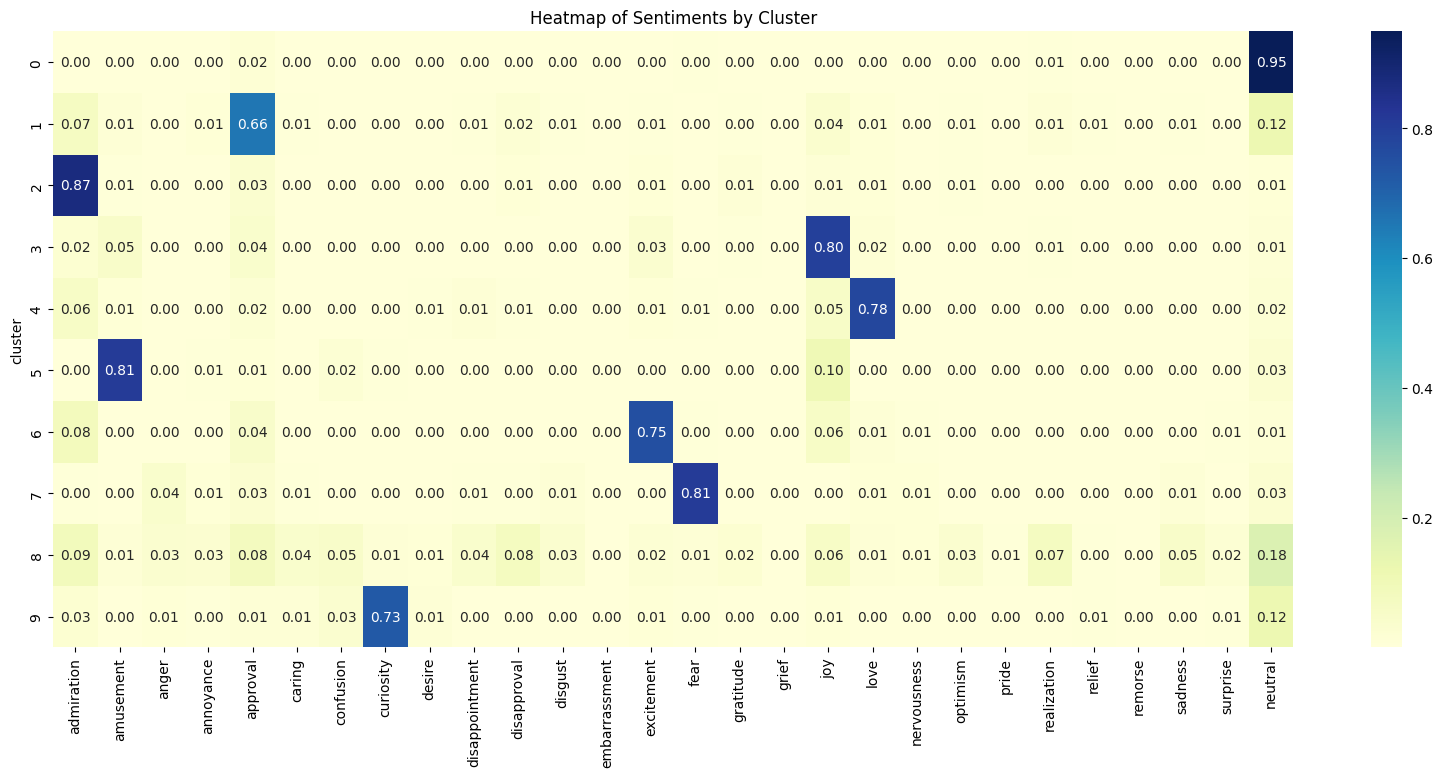

[2 0 8 7 1 9 3 4 6 5]


In [ ]:
import seaborn as sns

# We need to create a new DataFrame that contains the average sentiment values for each cluster
# First, let's group the data by the 'cluster' column and calculate the mean for each sentiment
clustered_sentiments = df.groupby('cluster')[sentiment_columns].mean()

# Now we'll create the heatmap using seaborn
plt.figure(figsize=(20, 8))
sns.heatmap(clustered_sentiments, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Heatmap of Sentiments by Cluster")
plt.show()
distinct_clusters = df['cluster'].unique()
print(distinct_clusters)



In [ ]:
for cluster_no in sorted(distinct_clusters):
  print("cluster:", cluster_no)
  for text_index in range(10):
    review_text = df.loc[df['cluster'] == cluster_no, 'review_text'].iloc[text_index]
    print(review_text)
  print("-----------------")
  print()

cluster: 0
 Early Access Review
&gt;Get into my first firefight &gt;Hear Carth Onasi from kotor yelling that he lost his shields 10/10
 Early Access Review
 Early Access Review
Clingy Friends Simulator :3
 Early Access Review
 Early Access Review
 Early Access Review
 Early Access Review
 Early Access Review
-----------------

cluster: 1
Do you love freakish looking vampires with too-long limbs and deathly pallor? Do you also love the 90s? How about sometimes punishing game play and a go-fetch RPG meted out against the strange and atmospheric backdrop of California? This is probably the game for you, then. Even if you don't like those things, I still recommend you play this game. Even now, after ALL this time, it's one of the best RPGs out there. Play it. The vampires don't sparkle.
I'm Canadian EH and I'm a lumberjack eh and drink beer eh. So don't expect to beat me eh ya hoser. Oh, and I also guzzle maple syrup by the litre. For all you neighboUrs to the south who doesn't know what a

In [ ]:
df.to_csv(os.path.join('/content/drive/MyDrive/', 'Project', 'cosine_cluster.csv'))